<a href="https://colab.research.google.com/github/aflores/Docs/blob/master/covid01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Covid-19 data

Just playing with Pandas using the data provided by:

 https://covidtracking.com/
 
## Things to try
 
 - Read data directly from the project's URL
 - Plot data to observe trends
 

## Journal

### 20MAR

  Initial setup.
  I got HTTP 403 when attempting to retrieve the date via URL but using the browser worked ok.
  So I saved the day's data to get going
  
 
### 21MAR

  Continue to have issues with HTTP retrieval (added comment to a similar Github issue)
  Created a function to plot the daily trend of positive, negavite, pending(testing) and deaths
  
  Plotting is not working as I expected:
  - Using 'date' in the x-axis interprets the axis as a large integer
  - Using 'dateChecked', shows the data in descending order
  :-o
  
  
 ### 22MAR
 
   On the plotting issues
   - type 'scatter' requires an numeric x-axis so by using dateChecked the plot is not 'sorted'
  
  
  



In [3]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data_url = "https://covidtracking.com/api/states/daily"
#data_url = "https://covid.cape.io/states/daily" # per webmasterkai github  - fixed in issue 7
#data_file = "/Users/aflores/projects/ml/covid-19/data/states/daily-latest.json"
# !ls /Users/aflores/projects/ml/covid-19/data/states
# !ln -sf

In [5]:
#daily = pd.read_json(data_file, convert_dates=True)
daily = pd.read_json(data_url)
daily.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200921,AK,7838.0,420807.0,NaN,428645.0,47.0,NaN,NaN,NaN,13.0,NaN,2439.0,A,9/21/2020 03:59,2020-09-21T03:59:00Z,09/20 23:59,45.0,NaN,2020-09-21T03:59:00Z,428645.0,7089.0,421275.0,7838.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,71,1649,428645,posNeg,1720,428645,0,0,2ec1459d557a0a9f8c65f1d11f0e2ac4bdf025f3,0,0,0,0,0,
1,20200921,AL,145780.0,928112.0,NaN,1059517.0,802.0,16487.0,NaN,1645.0,NaN,904.0,61232.0,A,9/21/2020 11:00,2020-09-21T11:00:00Z,09/21 07:00,2439.0,16487.0,2020-09-21T11:00:00Z,1059517.0,NaN,NaN,131405.0,2292.0,147.0,NaN,NaN,NaN,NaN,NaN,56961.0,NaN,NaN,NaN,NaN,NaN,NaN,1,818,4746,1073892,posNeg,5500,1073892,2,260,7570e181bedab66c64605b577126d7e6c27c0be7,0,0,0,0,0,
2,20200921,AR,76364.0,817238.0,NaN,891524.0,439.0,4986.0,228.0,NaN,95.0,632.0,66934.0,A+,9/21/2020 00:00,2020-09-21T00:00:00Z,09/20 20:00,1197.0,4986.0,2020-09-21T00:00:00Z,891524.0,NaN,817238.0,74286.0,1048.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10101.0,2242.0,21856.0,3300.0,5,641,6944,893602,posNeg,7540,893602,16,19,587b536e6faa93fe497751a7fe36885ecaffac9f,0,0,0,0,0,
3,20200921,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,9/1/2020 00:00,2020-09-01T00:00:00Z,08/31 20:00,0.0,NaN,2020-09-01T00:00:00Z,1571.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,1571,posNeg,0,1571,0,0,fe2ac904fb66e75d6ba49697cef3e44e5eee9332,0,0,0,0,0,
4,20200921,AZ,214251.0,1176711.0,NaN,1390962.0,472.0,21878.0,119.0,NaN,57.0,NaN,33946.0,A+,9/21/2020 00:00,2020-09-21T00:00:00Z,09/20 20:00,5478.0,21878.0,2020-09-21T00:00:00Z,1386627.0,NaN,NaN,209916.0,5186.0,292.0,NaN,NaN,283791.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,233,6805,1390962,posNeg,7038,1390962,2,2,b4e70c6157c61034ec73bb46afbd6bc486b5135d,0,0,0,0,0,


In [6]:
# show the columns data type

print(daily.dtypes)

date                             int64
state                           object
positive                       float64
negative                       float64
pending                        float64
totalTestResults               float64
hospitalizedCurrently          float64
hospitalizedCumulative         float64
inIcuCurrently                 float64
inIcuCumulative                float64
onVentilatorCurrently          float64
onVentilatorCumulative         float64
recovered                      float64
dataQualityGrade                object
lastUpdateEt                    object
dateModified                    object
checkTimeEt                     object
death                          float64
hospitalized                   float64
dateChecked                     object
totalTestsViral                float64
positiveTestsViral             float64
negativeTestsViral             float64
positiveCasesViral             float64
deathConfirmed                 float64
deathProbable            

In [24]:
#. *** TODO Create date column
#
# upon reading the data, the date column looks like a number
# but I rather use it as a string so we can show it in the x-axis
#
#
daily = daily.astype({"date": str})
daily['my_date'] = daily.date
daily['my_date'] = pd.to_datetime(daily['my_date'],format='%Y%m%d')
#print(daily.dtypes)
daily.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,my_date
0,20200921,AK,7838.0,420807.0,NaN,428645.0,47.0,NaN,NaN,NaN,13.0,NaN,2439.0,A,9/21/2020 03:59,2020-09-21T03:59:00Z,09/20 23:59,45.0,NaN,2020-09-21T03:59:00Z,428645.0,7089.0,421275.0,7838.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,71,1649,428645,posNeg,1720,428645,0,0,2ec1459d557a0a9f8c65f1d11f0e2ac4bdf025f3,0,0,0,0,0,,2020-09-21
1,20200921,AL,145780.0,928112.0,NaN,1059517.0,802.0,16487.0,NaN,1645.0,NaN,904.0,61232.0,A,9/21/2020 11:00,2020-09-21T11:00:00Z,09/21 07:00,2439.0,16487.0,2020-09-21T11:00:00Z,1059517.0,NaN,NaN,131405.0,2292.0,147.0,NaN,NaN,NaN,NaN,NaN,56961.0,NaN,NaN,NaN,NaN,NaN,NaN,1,818,4746,1073892,posNeg,5500,1073892,2,260,7570e181bedab66c64605b577126d7e6c27c0be7,0,0,0,0,0,,2020-09-21
2,20200921,AR,76364.0,817238.0,NaN,891524.0,439.0,4986.0,228.0,NaN,95.0,632.0,66934.0,A+,9/21/2020 00:00,2020-09-21T00:00:00Z,09/20 20:00,1197.0,4986.0,2020-09-21T00:00:00Z,891524.0,NaN,817238.0,74286.0,1048.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10101.0,2242.0,21856.0,3300.0,5,641,6944,893602,posNeg,7540,893602,16,19,587b536e6faa93fe497751a7fe36885ecaffac9f,0,0,0,0,0,,2020-09-21
3,20200921,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,9/1/2020 00:00,2020-09-01T00:00:00Z,08/31 20:00,0.0,NaN,2020-09-01T00:00:00Z,1571.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,1571,posNeg,0,1571,0,0,fe2ac904fb66e75d6ba49697cef3e44e5eee9332,0,0,0,0,0,,2020-09-21
4,20200921,AZ,214251.0,1176711.0,NaN,1390962.0,472.0,21878.0,119.0,NaN,57.0,NaN,33946.0,A+,9/21/2020 00:00,2020-09-21T00:00:00Z,09/20 20:00,5478.0,21878.0,2020-09-21T00:00:00Z,1386627.0,NaN,NaN,209916.0,5186.0,292.0,NaN,NaN,283791.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,233,6805,1390962,posNeg,7038,1390962,2,2,b4e70c6157c61034ec73bb46afbd6bc486b5135d,0,0,0,0,0,,2020-09-21


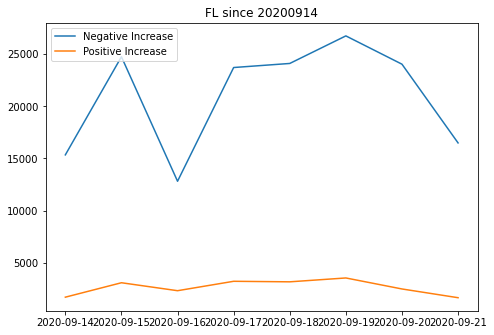

In [31]:
# How's Florida doing?? (rolling month)
#
# Shared x 'axis'
#
state_of_interest = 'FL'
days_back = 8

today = datetime.date.today()
daysBackDelta = datetime.timedelta(days=days_back)
starting_date = today - daysBackDelta
starting_date_str = starting_date.strftime('%Y%m%d')
#print(date_since)
#daily_increase.date = pd.to_datetime(daily_increase.date)

daily_increase = daily # daily[['state','date','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease']]

daily_increase = daily_increase[(daily_increase['state'] == state_of_interest) & (daily_increase['my_date'] >= starting_date_str) ] # remember the date is a str :-(
daily_increase = daily_increase.sort_values('date')

fig = plt.figure(figsize=[2, 1])
ax = fig.add_axes([1,2,3,4])
labels = []

if False:
  ax.plot(daily_increase.my_date, daily_increase.deathIncrease)
  labels.append('Death Increase')

if False:
  ax.plot(daily_increase.my_date, daily_increase.hospitalizedIncrease)
  labels.append('Hospitalzied Increase')

if True:
  ax.plot(daily_increase.my_date, daily_increase.negativeIncrease)
  labels.append('Negative Increase')

if True:
  ax.plot(daily_increase.my_date, daily_increase.positiveIncrease)
  labels.append('Positive Increase')

ax.legend(labels = labels, loc = 'upper left')

plt.title(state_of_interest + ' since ' + starting_date_str )
plt.show()

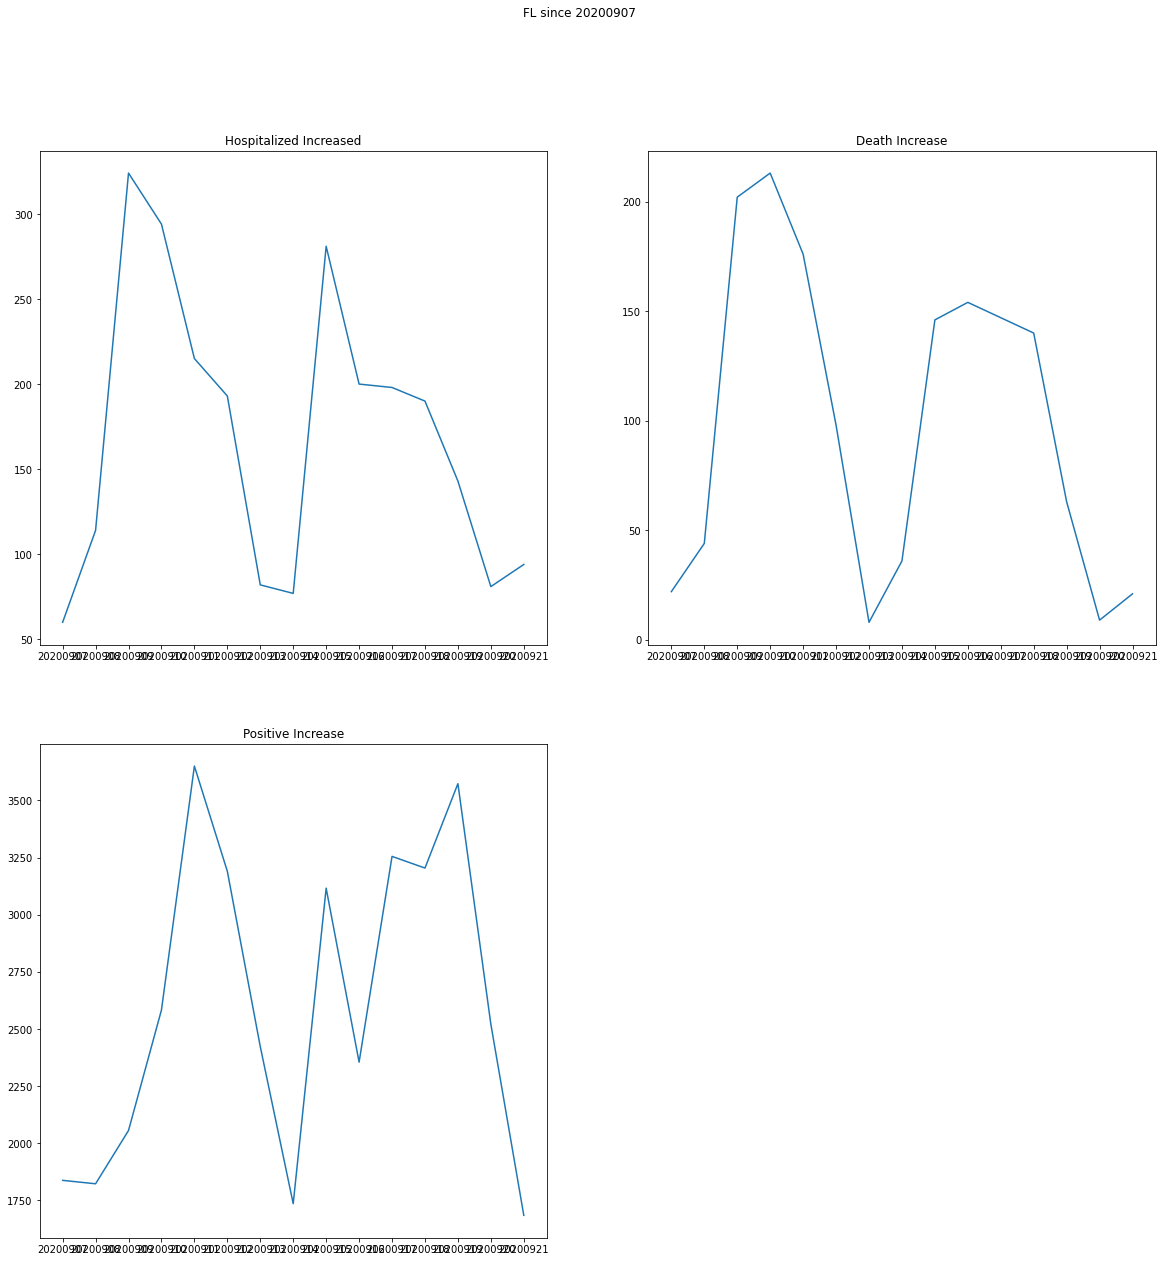

In [12]:
# How's Florida doing?? (rolling month)
#
# Using subplots
#
state_of_interest = 'FL'
days_back = 15

today = datetime.date.today()
daysBackDelta = one_day = datetime.timedelta(days=days_back)
starting_date = today - daysBackDelta
date_since = starting_date.strftime('%Y%m%d')
#print(date_since)

daily_increase = daily # daily[['state','date','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease']]
daily_increase = daily_increase[(daily_increase['state'] == state_of_interest) & (daily_increase['date'] >= date_since) ] # remember the date is a str :-(
daily_increase = daily_increase.sort_values('date')
fig = plt.figure(figsize=[20,20])



ax1 = fig.add_subplot(221)
ax1.plot(daily_increase.date, daily_increase.hospitalizedIncrease)
ax1.set_title('Hospitalized Increased')


ax2 = fig.add_subplot(222)
ax2.plot(daily_increase.date, daily_increase.deathIncrease)
ax2.set_title('Death Increase')

ax3 = fig.add_subplot(223)
ax3.plot(daily_increase.date, daily_increase.positiveIncrease)
ax3.set_title('Positive Increase')

fig.suptitle(state_of_interest + ' since ' + date_since )
fig.show()

In [13]:
def plot_state (state='FL', df=daily, hide_pending=False, hide_negative=False, hide_positive=False, hide_death=False):
    
    """ Plot daily trends for a single state


    """
    
    daily_tmp = df[daily['state'] == state]
    daily_tmp = daily_tmp.sort_values(by=['date'])
    
    x_axis = 'date' # date or dateChecked
    plot_kind = 'line' # type of plot
 
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('count')
    

    if (hide_positive == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='positive',color='red')
    
    if (hide_negative == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='negative',color='green')
    
    if (hide_pending == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='pending',color='blue')
    
    # this will be shown on the y-axis on the right side
    if (hide_death == False):
        ax2 = ax1.twinx()
        ax2.set_ylabel('deaths')
        #ax2.grid(linestyle='dotted')
        daily_tmp.plot(kind=plot_kind ,x=x_axis, ax=ax2, y='death',color='black', legend=False)
    
    plt.title(state)
    #plt.setp(ax1.get_xticklabels(),rotation='90')
    
    ax1.grid(linestyle='--')
    
    fig.set_size_inches(10,8)
    fig.tight_layout() 
    
    plt.show()

# test the function    
#plot_state_dual_y(state='NY', hide_pending=True)

In [14]:
def state_pct_change(df_full, state, num_days, col_name):
  """ Percent change over 'num_days' number of days

  """

  df = df_full[df_full['state']== state].head(num_days).sort_values('date',ascending=False)
  row_count = len(df.index)
  ref_value = df.iloc[row_count-1][col_name]
  current_value = df.iloc[0][col_name]
  pct =  (current_value - ref_value)/ref_value
  
  return (col_name, num_days, pct, current_value)

# varx = state_pct_change(daily,'FL',5,'positive')
# print('The current value for "{0[0]}" is "{0[3]}" representing a {0[2]:3.1%} change over {0[1]} days.'.format(varx))

In FL, the current value for "positive" is: 685,439.0 representing a  6% change over 15 days.
In FL, the current value for "death" is: 13,480.0 representing a 12% change over 15 days.
In NY, the current value for "positive" is: 450,473.0 representing a  2% change over 15 days.
In NY, the current value for "death" is: 25,428.0 representing a  0% change over 15 days.
In CA, the current value for "positive" is: 781,694.0 representing a  6% change over 15 days.
In CA, the current value for "death" is: 15,018.0 representing a  9% change over 15 days.
In WA, the current value for "positive" is: 82,548.0 representing a  7% change over 15 days.
In WA, the current value for "death" is: 2,037.0 representing a  4% change over 15 days.
In IL, the current value for "positive" is: 277,933.0 representing a 10% change over 15 days.
In IL, the current value for "death" is: 8,693.0 representing a  4% change over 15 days.
In LA, the current value for "positive" is: 162,501.0 representing a  5% change ove

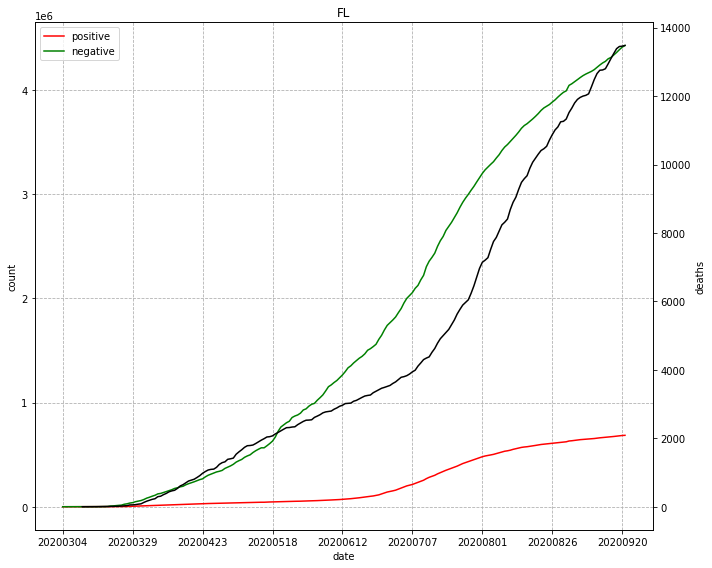

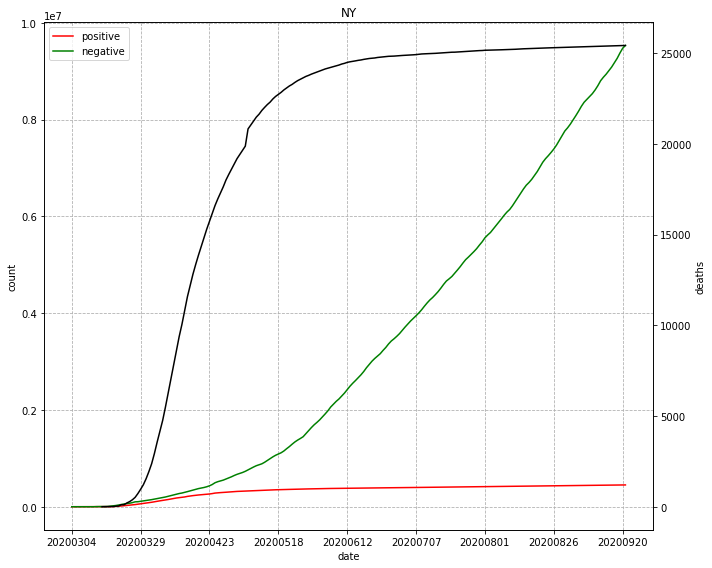

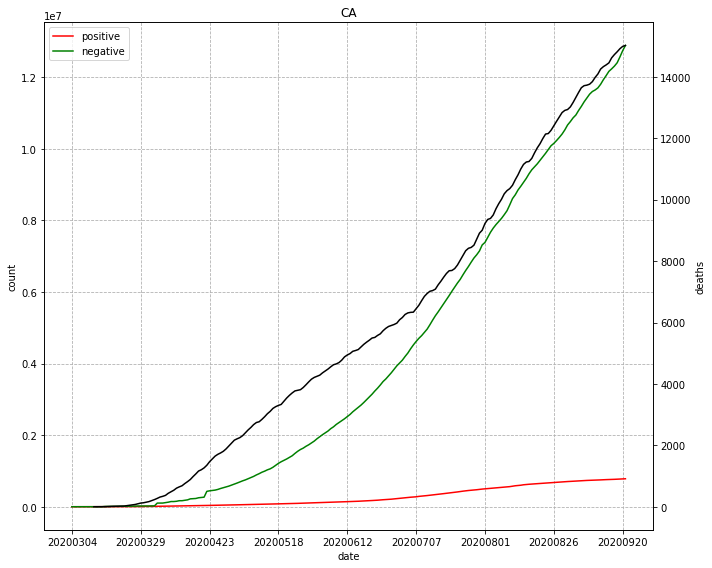

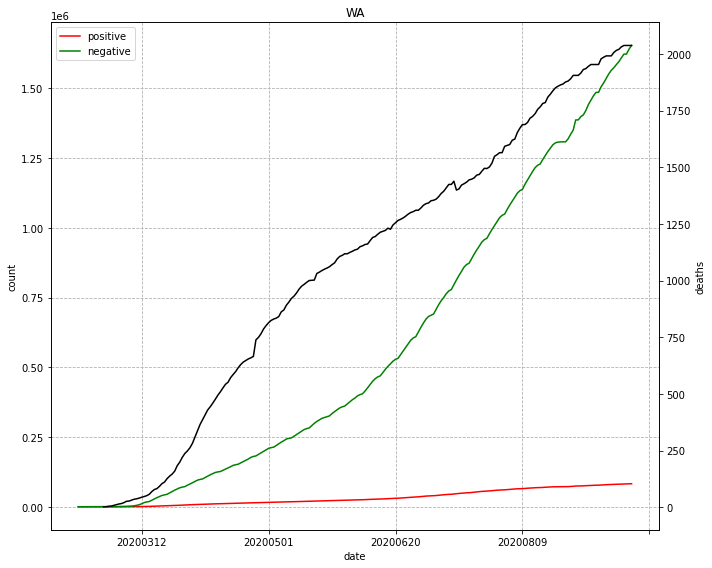

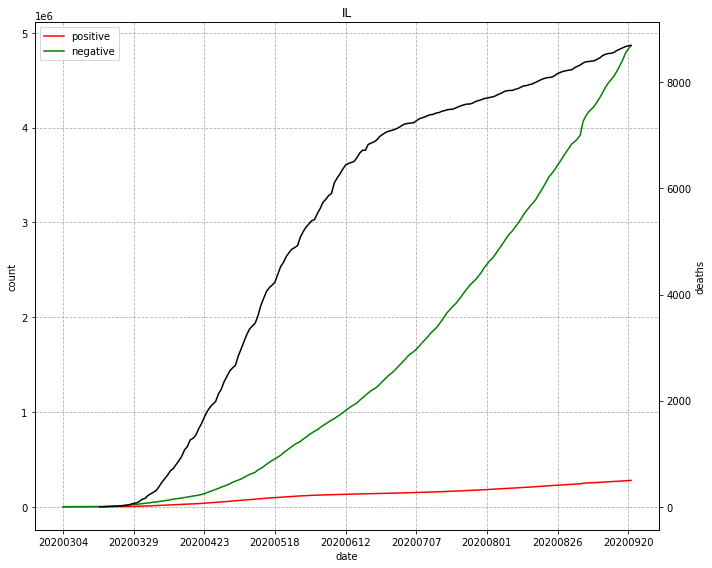

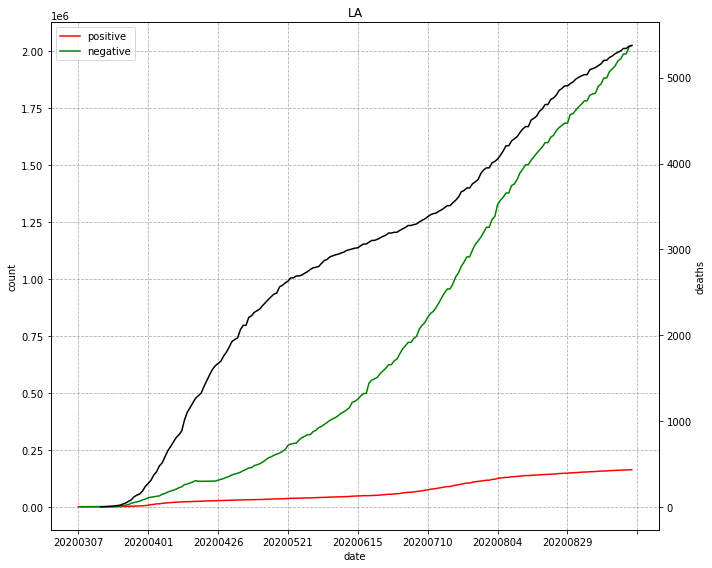

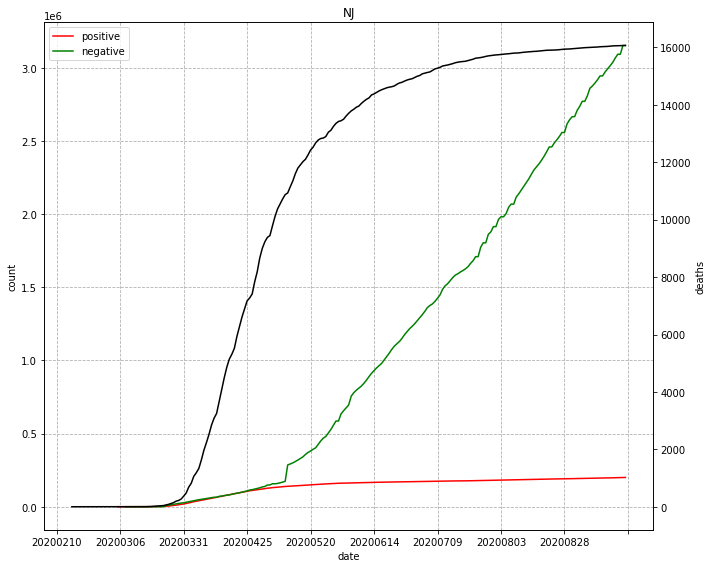

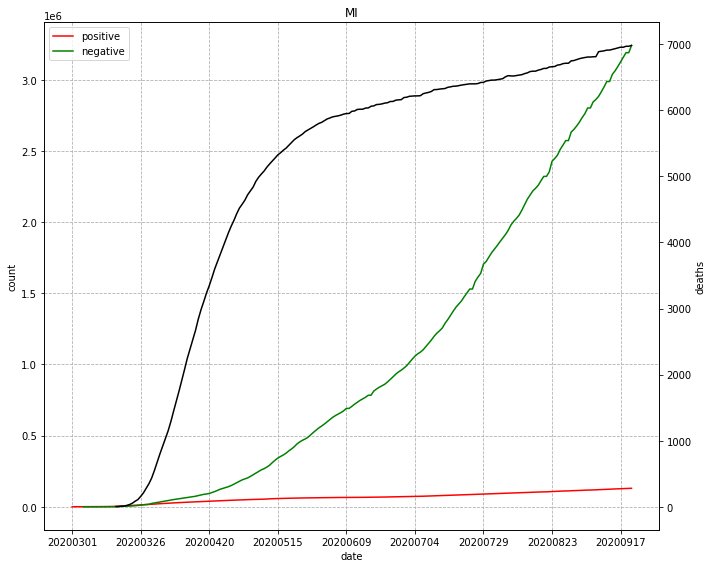

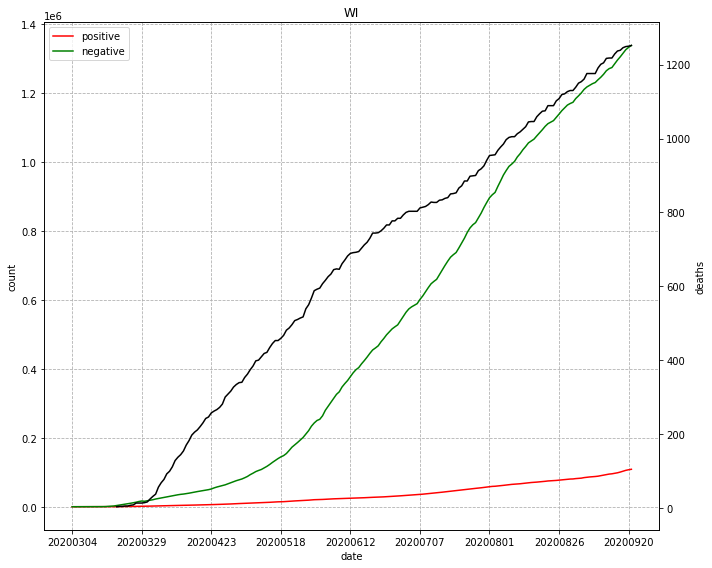

In [15]:
fmt_str = 'In {1}, the current value for "{0[0]}" is: {0[3]:,} representing a {0[2]:3.0%} change over {0[1]:d} days.'

states = ('FL','NY','CA','WA', 'IL','LA','NJ','MI','WI')
for st in states:
    print(fmt_str.format(state_pct_change(daily,st,15,'positive'),st))
    print(fmt_str.format(state_pct_change(daily,st,15,'death'),st))
for st in states:    
    plot_state(st,hide_pending=True)

In [ ]:
#from datetime import date
daily_increase = daily[['state','date','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease']]
daily_increase = daily_increase[(daily_increase['state'] == 'FL') & (daily_increase['date'] >= '20200801') ]
daily_increase = daily_increase.sort_values('date')
daily_increase.plot(x='date', y=['deathIncrease'])
daily_increase.plot(x='date', y=['hospitalizedIncrease'])
daily_increase.plot(x='date', y=['negativeIncrease'])
daily_increase.plot(x='date', y=['positiveIncrease'])